In [1]:
import gym

In [ ]:
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [39]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers

In [25]:
class GenericNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims,n_actions):
        super(GenericNetwork,self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.lr = lr
        self.fc1 = nn.Linear(*self.input_dims,self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims,self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu:0')
        self.to(self.device)
    
    def forward(self,observation):
        state = T.Tensor(observation).to(self.device)
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    

In [31]:
class Agent(object):
    def __init__(self, alpha, beta, input_dims, gamma=0.99, l1_size=256, l2_size=256, n_actions=2):
        self.gamma = gamma
        self.log_probs = None
        self.actor = GenericNetwork(alpha, input_dims, l1_size, l2_size, n_actions)
        self.critic = GenericNetwork(beta, input_dims, l1_size, l2_size, n_actions=1)
    
    def choose_action(self, observation):
        probabilities = F.softmax(self.actor.forward(observation))
        action_probs = T.distributions.Categorical(probabilities)
        action = action_probs.sample()
        self.log_probs = action_probs.log_prob(action)
        
        return action.item()
    
    def learn(self, state, reward, new_state, done):
        self.actor.optimizer.zero_grad()
        self.critic.optimizer.zero_grad()
        
        critic_value_ = self.critic.forward(state)
        critic_value = self.critic.forward(new_state)
        
        #int(done) so when episode is done we dont have to take into acount the reward
        delta = ((reward + self.gamma*critic_value_*(1-int(done))) - critic_value)
        
        actor_loss = -self.log_probs * delta
        critic_loss = delta**2
        (actor_loss + critic_loss).backward()
        
        self.actor.optimizer.step()
        self.critic.optimizer.step()
        

In [35]:
def plotLearning(scores, filename, x=None, window=5):
    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-window):(t+1)])
    if x is None:
        x = [i for i in range(N)]
    plt.ylabel('Score')
    plt.xlabel('Game')
    plt.plot(x, running_avg)
    plt.savefig(filename)

In [32]:
agent = Agent(alpha=0.00001,beta=0.0005,input_dims=[4], gamma=0.99,n_actions=2, l1_size=32,l2_size=32)
env = gym.make('CartPole-v1')
score_history = []
n_episodes = 2500
for i in range(n_episodes):
    done = False
    score = 0
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.learn(observation, reward, observation_, done)
        observation = observation_
    print('episode', i, 'score %.3f' %score)
    score_history.append(score)
filename = 'cartpole.png'
plotLearning(score_history, filename=filename, window=10)
    

/home/george/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


episode 0 score 24.000
episode 1 score 15.000
episode 2 score 13.000
episode 3 score 14.000
episode 4 score 23.000
episode 5 score 20.000
episode 6 score 13.000
episode 7 score 17.000
episode 8 score 32.000
episode 9 score 41.000
episode 10 score 42.000
episode 11 score 10.000
episode 12 score 13.000
episode 13 score 15.000
episode 14 score 13.000
episode 15 score 12.000
episode 16 score 26.000
episode 17 score 18.000
episode 18 score 14.000
episode 19 score 28.000
episode 20 score 11.000
episode 21 score 30.000
episode 22 score 24.000
episode 23 score 9.000
episode 24 score 21.000
episode 25 score 20.000
episode 26 score 15.000
episode 27 score 21.000
episode 28 score 19.000
episode 29 score 12.000
episode 30 score 12.000
episode 31 score 16.000
episode 32 score 10.000
episode 33 score 12.000
episode 34 score 13.000
episode 35 score 16.000
episode 36 score 9.000
episode 37 score 15.000
episode 38 score 25.000
episode 39 score 33.000
episode 40 score 14.000
episode 41 score 10.000
epis

episode 338 score 15.000
episode 339 score 19.000
episode 340 score 23.000
episode 341 score 22.000
episode 342 score 36.000
episode 343 score 13.000
episode 344 score 13.000
episode 345 score 16.000
episode 346 score 24.000
episode 347 score 9.000
episode 348 score 16.000
episode 349 score 14.000
episode 350 score 15.000
episode 351 score 50.000
episode 352 score 48.000
episode 353 score 15.000
episode 354 score 34.000
episode 355 score 14.000
episode 356 score 57.000
episode 357 score 14.000
episode 358 score 49.000
episode 359 score 57.000
episode 360 score 15.000
episode 361 score 47.000
episode 362 score 18.000
episode 363 score 20.000
episode 364 score 31.000
episode 365 score 9.000
episode 366 score 18.000
episode 367 score 22.000
episode 368 score 13.000
episode 369 score 18.000
episode 370 score 26.000
episode 371 score 14.000
episode 372 score 9.000
episode 373 score 11.000
episode 374 score 9.000
episode 375 score 21.000
episode 376 score 19.000
episode 377 score 29.000
epis

episode 671 score 22.000
episode 672 score 13.000
episode 673 score 20.000
episode 674 score 18.000
episode 675 score 29.000
episode 676 score 52.000
episode 677 score 9.000
episode 678 score 18.000
episode 679 score 18.000
episode 680 score 33.000
episode 681 score 15.000
episode 682 score 10.000
episode 683 score 17.000
episode 684 score 13.000
episode 685 score 29.000
episode 686 score 62.000
episode 687 score 16.000
episode 688 score 22.000
episode 689 score 17.000
episode 690 score 36.000
episode 691 score 34.000
episode 692 score 11.000
episode 693 score 37.000
episode 694 score 14.000
episode 695 score 32.000
episode 696 score 12.000
episode 697 score 35.000
episode 698 score 30.000
episode 699 score 14.000
episode 700 score 10.000
episode 701 score 13.000
episode 702 score 23.000
episode 703 score 14.000
episode 704 score 12.000
episode 705 score 17.000
episode 706 score 30.000
episode 707 score 24.000
episode 708 score 35.000
episode 709 score 24.000
episode 710 score 55.000
e

episode 1000 score 15.000
episode 1001 score 18.000
episode 1002 score 56.000
episode 1003 score 11.000
episode 1004 score 17.000
episode 1005 score 20.000
episode 1006 score 33.000
episode 1007 score 16.000
episode 1008 score 31.000
episode 1009 score 32.000
episode 1010 score 14.000
episode 1011 score 15.000
episode 1012 score 15.000
episode 1013 score 37.000
episode 1014 score 32.000
episode 1015 score 21.000
episode 1016 score 30.000
episode 1017 score 9.000
episode 1018 score 17.000
episode 1019 score 19.000
episode 1020 score 25.000
episode 1021 score 36.000
episode 1022 score 18.000
episode 1023 score 17.000
episode 1024 score 20.000
episode 1025 score 15.000
episode 1026 score 19.000
episode 1027 score 14.000
episode 1028 score 19.000
episode 1029 score 11.000
episode 1030 score 9.000
episode 1031 score 23.000
episode 1032 score 21.000
episode 1033 score 27.000
episode 1034 score 53.000
episode 1035 score 19.000
episode 1036 score 24.000
episode 1037 score 30.000
episode 1038 s

episode 1316 score 34.000
episode 1317 score 119.000
episode 1318 score 23.000
episode 1319 score 35.000
episode 1320 score 41.000
episode 1321 score 24.000
episode 1322 score 12.000
episode 1323 score 42.000
episode 1324 score 29.000
episode 1325 score 27.000
episode 1326 score 26.000
episode 1327 score 19.000
episode 1328 score 18.000
episode 1329 score 36.000
episode 1330 score 27.000
episode 1331 score 21.000
episode 1332 score 28.000
episode 1333 score 18.000
episode 1334 score 16.000
episode 1335 score 26.000
episode 1336 score 14.000
episode 1337 score 29.000
episode 1338 score 20.000
episode 1339 score 24.000
episode 1340 score 16.000
episode 1341 score 13.000
episode 1342 score 22.000
episode 1343 score 12.000
episode 1344 score 22.000
episode 1345 score 18.000
episode 1346 score 11.000
episode 1347 score 18.000
episode 1348 score 33.000
episode 1349 score 73.000
episode 1350 score 38.000
episode 1351 score 17.000
episode 1352 score 11.000
episode 1353 score 19.000
episode 135

episode 1634 score 110.000
episode 1635 score 42.000
episode 1636 score 43.000
episode 1637 score 32.000
episode 1638 score 13.000
episode 1639 score 28.000
episode 1640 score 41.000
episode 1641 score 39.000
episode 1642 score 25.000
episode 1643 score 14.000
episode 1644 score 25.000
episode 1645 score 46.000
episode 1646 score 24.000
episode 1647 score 23.000
episode 1648 score 21.000
episode 1649 score 19.000
episode 1650 score 19.000
episode 1651 score 54.000
episode 1652 score 19.000
episode 1653 score 32.000
episode 1654 score 28.000
episode 1655 score 37.000
episode 1656 score 20.000
episode 1657 score 57.000
episode 1658 score 39.000
episode 1659 score 12.000
episode 1660 score 72.000
episode 1661 score 28.000
episode 1662 score 24.000
episode 1663 score 39.000
episode 1664 score 33.000
episode 1665 score 83.000
episode 1666 score 18.000
episode 1667 score 49.000
episode 1668 score 63.000
episode 1669 score 56.000
episode 1670 score 23.000
episode 1671 score 13.000
episode 167

episode 1950 score 26.000
episode 1951 score 28.000
episode 1952 score 38.000
episode 1953 score 54.000
episode 1954 score 45.000
episode 1955 score 33.000
episode 1956 score 38.000
episode 1957 score 62.000
episode 1958 score 71.000
episode 1959 score 27.000
episode 1960 score 102.000
episode 1961 score 27.000
episode 1962 score 35.000
episode 1963 score 53.000
episode 1964 score 29.000
episode 1965 score 111.000
episode 1966 score 31.000
episode 1967 score 24.000
episode 1968 score 37.000
episode 1969 score 78.000
episode 1970 score 47.000
episode 1971 score 77.000
episode 1972 score 33.000
episode 1973 score 26.000
episode 1974 score 35.000
episode 1975 score 173.000
episode 1976 score 51.000
episode 1977 score 122.000
episode 1978 score 56.000
episode 1979 score 45.000
episode 1980 score 67.000
episode 1981 score 42.000
episode 1982 score 56.000
episode 1983 score 80.000
episode 1984 score 65.000
episode 1985 score 36.000
episode 1986 score 37.000
episode 1987 score 22.000
episode 

episode 2265 score 115.000
episode 2266 score 31.000
episode 2267 score 63.000
episode 2268 score 58.000
episode 2269 score 68.000
episode 2270 score 23.000
episode 2271 score 40.000
episode 2272 score 25.000
episode 2273 score 54.000
episode 2274 score 66.000
episode 2275 score 71.000
episode 2276 score 68.000
episode 2277 score 48.000
episode 2278 score 58.000
episode 2279 score 57.000
episode 2280 score 59.000
episode 2281 score 76.000
episode 2282 score 48.000
episode 2283 score 87.000
episode 2284 score 58.000
episode 2285 score 83.000
episode 2286 score 88.000
episode 2287 score 40.000
episode 2288 score 40.000
episode 2289 score 32.000
episode 2290 score 51.000
episode 2291 score 30.000
episode 2292 score 42.000
episode 2293 score 35.000
episode 2294 score 32.000
episode 2295 score 43.000
episode 2296 score 32.000
episode 2297 score 30.000
episode 2298 score 60.000
episode 2299 score 39.000
episode 2300 score 40.000
episode 2301 score 24.000
episode 2302 score 89.000
episode 230

AttributeError: module 'matplotlib' has no attribute 'ylabel'

In [33]:
print(score_history)

[24.0, 15.0, 13.0, 14.0, 23.0, 20.0, 13.0, 17.0, 32.0, 41.0, 42.0, 10.0, 13.0, 15.0, 13.0, 12.0, 26.0, 18.0, 14.0, 28.0, 11.0, 30.0, 24.0, 9.0, 21.0, 20.0, 15.0, 21.0, 19.0, 12.0, 12.0, 16.0, 10.0, 12.0, 13.0, 16.0, 9.0, 15.0, 25.0, 33.0, 14.0, 10.0, 16.0, 11.0, 9.0, 12.0, 25.0, 16.0, 22.0, 16.0, 44.0, 13.0, 14.0, 14.0, 19.0, 23.0, 21.0, 51.0, 9.0, 10.0, 24.0, 18.0, 16.0, 12.0, 15.0, 20.0, 16.0, 23.0, 33.0, 30.0, 13.0, 10.0, 13.0, 12.0, 19.0, 23.0, 40.0, 11.0, 21.0, 13.0, 19.0, 28.0, 13.0, 35.0, 34.0, 29.0, 27.0, 46.0, 28.0, 14.0, 9.0, 20.0, 18.0, 12.0, 27.0, 11.0, 23.0, 36.0, 13.0, 28.0, 39.0, 14.0, 23.0, 11.0, 16.0, 15.0, 32.0, 16.0, 34.0, 28.0, 11.0, 24.0, 12.0, 16.0, 58.0, 14.0, 16.0, 21.0, 24.0, 15.0, 13.0, 53.0, 15.0, 21.0, 13.0, 17.0, 13.0, 11.0, 32.0, 24.0, 14.0, 11.0, 13.0, 10.0, 15.0, 22.0, 12.0, 15.0, 27.0, 15.0, 15.0, 10.0, 15.0, 21.0, 36.0, 14.0, 22.0, 12.0, 18.0, 11.0, 28.0, 14.0, 13.0, 18.0, 15.0, 11.0, 19.0, 29.0, 11.0, 42.0, 20.0, 19.0, 18.0, 17.0, 20.0, 15.0, 17.0, 12

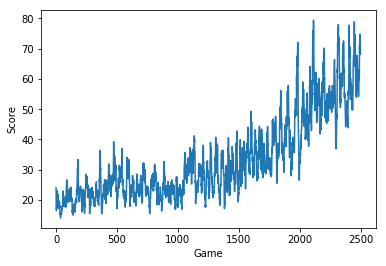

In [40]:
plotLearning(score_history, filename=filename, window=10)

In [41]:
# Create Net model class

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    
    # Prediction
    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [42]:
layers = [2,10,10,3]
model = Net(layers)
lr = 0.01
optimizer = torchioptm.sGD(model.parameters, lr=lr)
train_loader = DataLoader()

In [ ]:
layers = [2,10,10,3]
model = Net(layers)
optimizer = torchioptm.sGD()